In [27]:
import os
import numpy as np
from calibration.calibration import FilmCalibration

In [28]:
calibracion = FilmCalibration.from_json("calibracion_test.json")

In [29]:
for key, value in calibracion.__dict__.items():
    print(f"{key}: {value}")

groundtruth_image: [[[249 255 255]
  [249 255 255]
  [249 255 255]
  ...
  [249 255 255]
  [249 255 255]
  [249 255 255]]

 [[249 255 255]
  [249 255 255]
  [249 255 255]
  ...
  [249 255 255]
  [249 255 255]
  [249 255 255]]

 [[249 255 255]
  [249 255 255]
  [249 255 255]
  ...
  [249 255 255]
  [249 255 255]
  [249 255 255]]

 ...

 [[249 255 255]
  [249 255 255]
  [249 255 255]
  ...
  [249 255 255]
  [249 255 255]
  [249 255 255]]

 [[249 255 255]
  [249 255 255]
  [249 255 255]
  ...
  [249 255 255]
  [249 255 255]
  [249 255 255]]

 [[249 255 255]
  [249 255 255]
  [249 255 255]
  ...
  [249 255 255]
  [249 255 255]
  [249 255 255]]]
bits_per_channel: 8
calibration_type: single-channel
filter_type: None
doses: {}
pixel_values_before: [np.float64(179.87535000000003), np.float64(176.66084999999998), np.float64(132.47915)]
dose_to_independent_by_channel: [{0.0: np.float64(0.0), 0.2: np.float64(0.03955710831494176), 0.5: np.float64(0.07656138274584312), 1.0: np.float64(0.12703487517

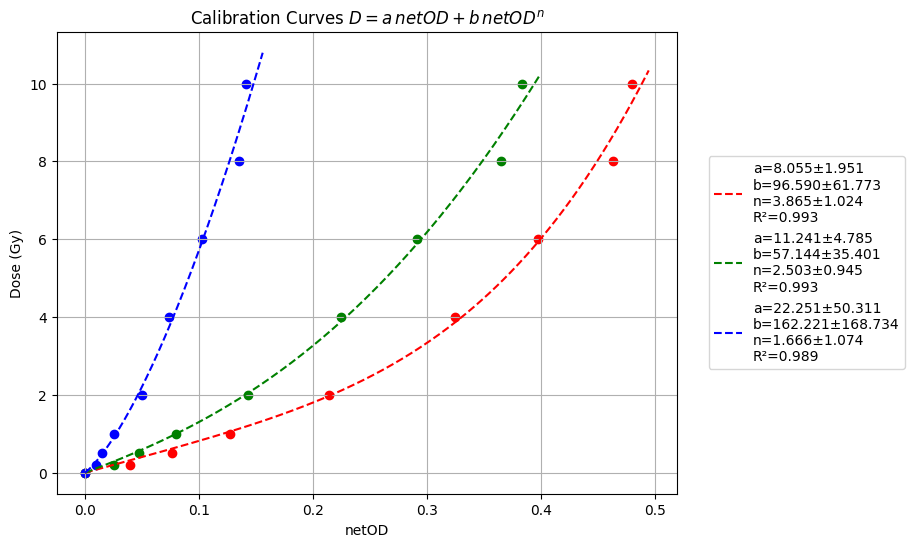

In [30]:
calibracion.graph_calibration_curve()

In [31]:
film_path = os.path.join("media", "mama100cropped.tif")
dose_map = calibracion.compute_dose_map(film_path, channel=2)

print(dose_map)

[[1.24766591 1.61523446 0.23674624 ... 0.47948372 0.23674624 0.91408899]
 [0.47948372 0.91408899 0.         ... 0.76027536 0.35311102 0.35311102]
 [1.24766591 1.07659245 1.07659245 ... 0.23674624 0.13127494 0.13127494]
 ...
 [1.07659245 1.24766591 0.91408899 ... 0.61532453 0.91408899 0.76027536]
 [0.91408899 0.91408899 0.35311102 ... 0.76027536 0.76027536 1.07659245]
 [0.47948372 0.23674624 0.23674624 ... 1.07659245 1.61523446 0.47948372]]


c:\Users\eduar\OneDrive - Universidad de los Andes\2025-10\Tesis Física\FilmQADose rama alternativa\FilmQADose\app\calibration\functions.py:56: RuntimeWarning: invalid value encountered in power
  return a * x + b * (x ** n)


In [32]:
a = dose_map.flatten()
print(a)
print(len(a))


b = np.sort(a)
print(b[-1000:])

[1.24766591 1.61523446 0.23674624 ... 1.07659245 1.61523446 0.47948372]
757680
[ 4.83878808  4.83878808  4.83878808  4.83878808  4.83878808  4.83878808
  4.83878808  4.83878808  4.83878808  4.83878808  4.83878808  4.83878808
  4.83878808  4.83878808  4.83878808  4.83878808  4.83878808  4.83878808
  4.83878808  4.83878808  4.83878808  4.83878808  4.83878808  4.83878808
  4.83878808  4.83878808  4.83878808  4.83878808  4.83878808  4.83878808
  4.83878808  4.83878808  4.83878808  4.83878808  4.83878808  4.83878808
  4.83878808  4.83878808  4.83878808  4.83878808  4.83878808  4.83878808
  4.83878808  4.83878808  4.83878808  4.83878808  4.83878808  4.83878808
  4.83878808  4.83878808  4.83878808  4.83878808  4.83878808  4.83878808
  4.83878808  4.83878808  4.83878808  4.83878808  4.83878808  4.83878808
  4.83878808  4.83878808  4.83878808  4.83878808  4.83878808  4.83878808
  4.83878808  4.83878808  4.83878808  4.83878808  4.83878808  4.83878808
  4.83878808  4.83878808  4.83878808  4.83878

In [33]:
dose_map.min()

np.float64(0.0)

In [34]:
dose_map.max()

np.float64(22.81630018467126)

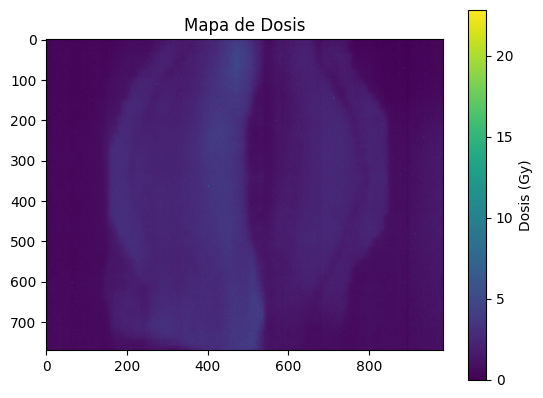

In [35]:
# plot dose map
import matplotlib.pyplot as plt

plt.imshow(dose_map)  # cmap='jet' o la que prefieras
plt.colorbar(label='Dosis (Gy)')  # Etiqueta para la barra de color
plt.title('Mapa de Dosis')
plt.show()


AttributeError: 'Axes' object has no attribute 'colorbar'

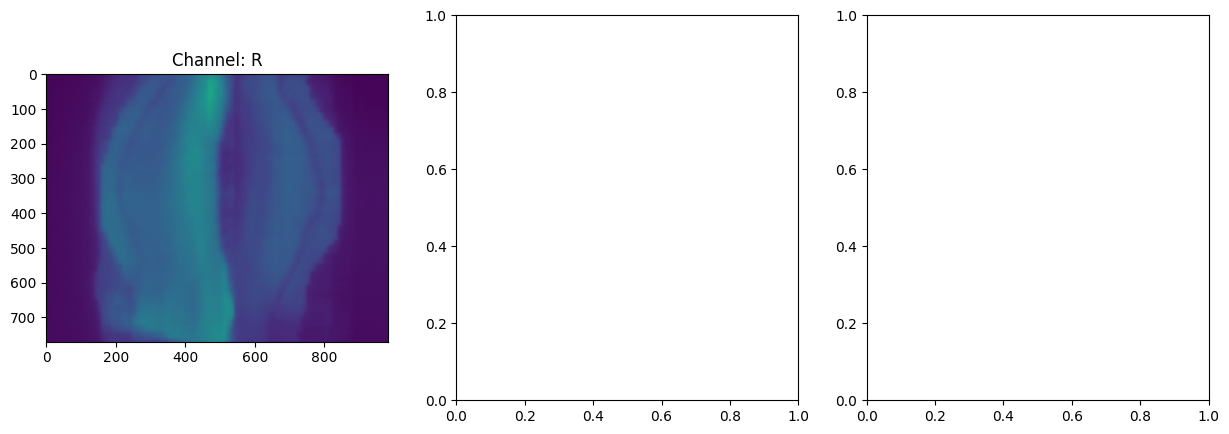

In [36]:
dose_maps = [None]*3
for i in range(3):
    dose_maps[i] = calibracion.compute_dose_map(film_path, channel=i)

# plot dose map
import matplotlib.pyplot as plt

canales = ['R', 'G', 'B']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    axs[i].imshow(dose_maps[i])  
    axs[i].set_title(f'Channel: {canales[i]}')
    axs[i].colorbar(label='Dosis (Gy)')  # Etiqueta para la barra de color
    axs[i].set_axis_off

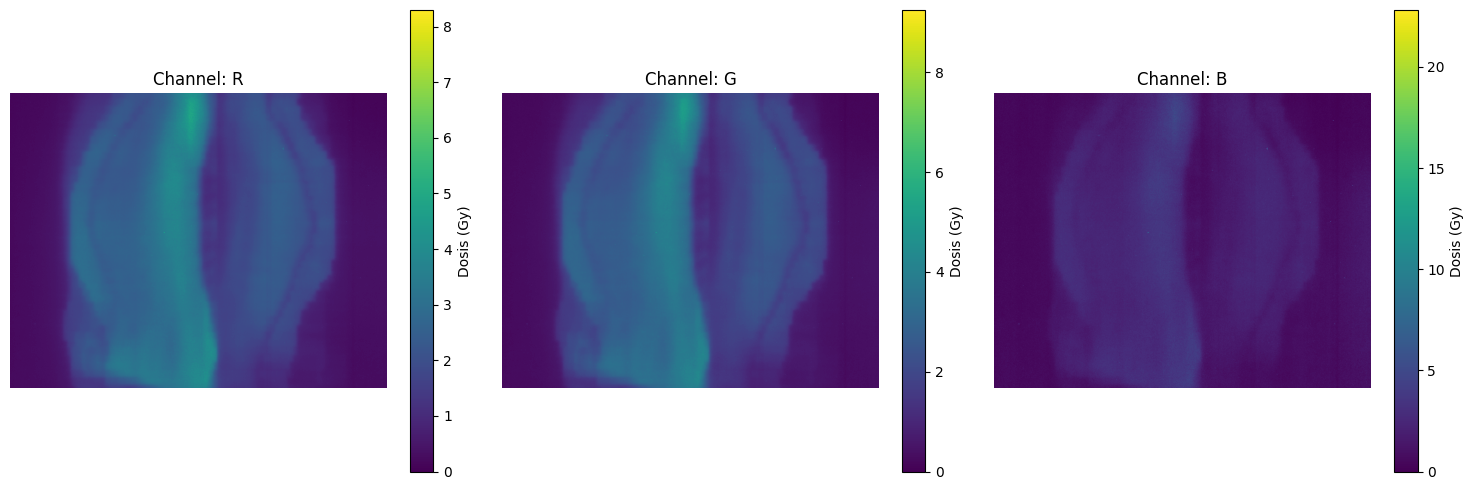

In [ ]:
dose_maps = [None]*3
for i in range(3):
    dose_maps[i] = calibracion.compute_dose_map(film_path, channel=i)

import matplotlib.pyplot as plt

canales = ['R', 'G', 'B']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    # Guardas el objeto de tipo AxesImage que retorna imshow
    im = axs[i].imshow(dose_maps[i])
    axs[i].set_title(f'Channel: {canales[i]}')
    # Aquí creas la barra de color para 'im' asociándola al eje axs[i]
    fig.colorbar(im, ax=axs[i], label='Dosis (Gy)')
    # O también podrías usar plt.colorbar(im, ax=axs[i], label='Dosis (Gy)')

    # Corrige la llamada a set_axis_off (que es un método y se ejecuta con paréntesis)
    axs[i].set_axis_off()

plt.tight_layout()
plt.show()


In [ ]:
# plot dose map
import matplotlib.pyplot as plt

plt.imshow(dose_map)  # cmap='jet' o la que prefieras
plt.colorbar(label='Dosis (Gy)')  # Etiqueta para la barra de color
plt.title('Mapa de Dosis')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.show()


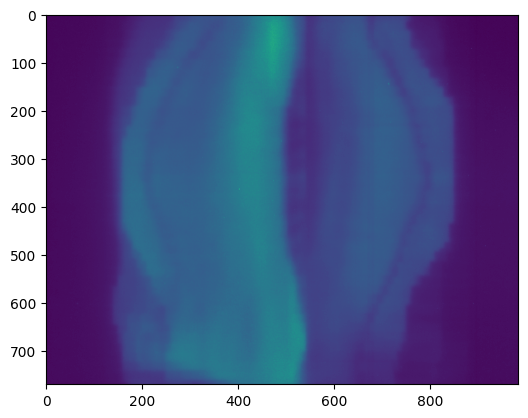

In [ ]:
# plot dose map

import matplotlib.pyplot as plt

plt.imshow(dose_map)

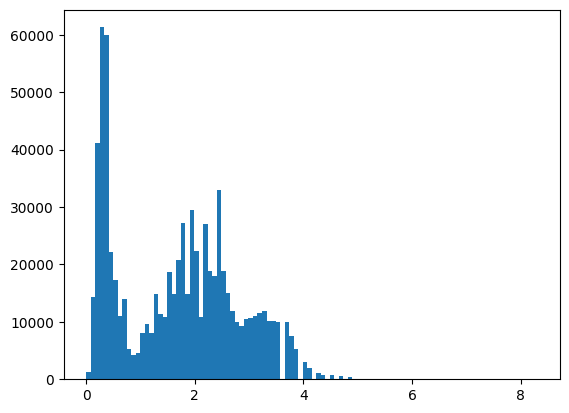

In [ ]:
# histograma del mapa
plt.figure()
plt.hist(dose_map.flatten(), bins=100)
plt.show()